# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [20]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price: ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price: $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **

- **`'RM'`**

    For instance, if only **`'RM'` increases** and all other feature remains the constant, than it is evident that the value of **`'MEDV'`** will also **increase**. If a house has 5 rooms the cost of it will be more than the house with 3 rooms, as it will require more area, time and funds to build it; vice versa, a house with 2 rooms will cost less than the house with 3 rooms.


- **`'MEDV'`**

    If the neighbourhood has higher percentage of "lower class" the cost of the property will be less as the demand for such a property will be less. Affluent class increases the demand for houses/property and therefore there will be increase in the price of the houses. In conclusion, we can say that the *increase* in the value of **`'LSTAT'` decreases** the value of **`'MEDV'`**


- **`'PTRATIO'`**

    **`'PTRATIO'`** when **increased** also **increases** the value of **`'MEDV'`** to a certain extent but if the ratio is too high it may be indicative that there are very few schools and so the price of houses in such areas may **decline**. So, for this feature it will not be correct to say that the value of **`'MEDV'`** is directly proportional to the value of **`'PTRATIO'`**. Areas with higher lower class may, however, not look at this ratio to significantly affect the **`'MEDV'`** value.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [4]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [5]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:** Model has a coefficient of determination, R^2, of 0.923. 

**Goodness of Fit** is a measure of how well the model fits the set of data observed against the output value. We can determine the **Goodness of Fit** of a regression model by calculating the **coefficient of determination**, that is, **R<sup>2</sup>**. A value closer to 1 indicates that the model is good fit and predicts the target variable most closely to the observed data, while a value closer to 0 indicates that the model is not capable of predicting the expected output.

In the above example, the result of **R<sup>2</sup>** is very close to 1, hence we can say that the model is capable of predicting the target variable with little error.  

As the number of test data used to evaluate the **Goodness of Fit** is quite less, we cannot say this with confidence that the **R<sup>2</sup>** is the true performance metric value of the model. There could be a decrease in the **coefficient of determination** as more test data are added for evaluation. Thus, for the model to successfully captured the variations of the target variable, more test data should be used for evaluation.

----

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [6]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test =  train_test_split(features, prices, test_size=0.2, random_state=30)

# Success
print "Training and testing split was successful."
print X_train.shape, y_train.shape, X_test.shape

Training and testing split was successful.
(391, 3) (391,) (98, 3)


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **

It is necessary to evaluate the performance of a learning algorithm when predicting new unseen data in order that it is robust and capable of making good predictions. Training it on the entire training set and then evaluating on the same set would mean that the model is perfect, but this is misleading as the model would not be able to generalise on new sets of data. It is also called cheating in Machine Learning. This would also means that we are overfitting the data to the model. 

Splitting a dataset into some percentage of **training and testing subsets**, allows us to train the model on the **training set** and then evaluate it on new separate set - **the testing set**. This allows us to estimate the performance of the created a model and how well it fits on new unseen data. This way we can get a fair idea of the performance of the learning algorithm and provide a better statistics in terms of evaluating the model.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

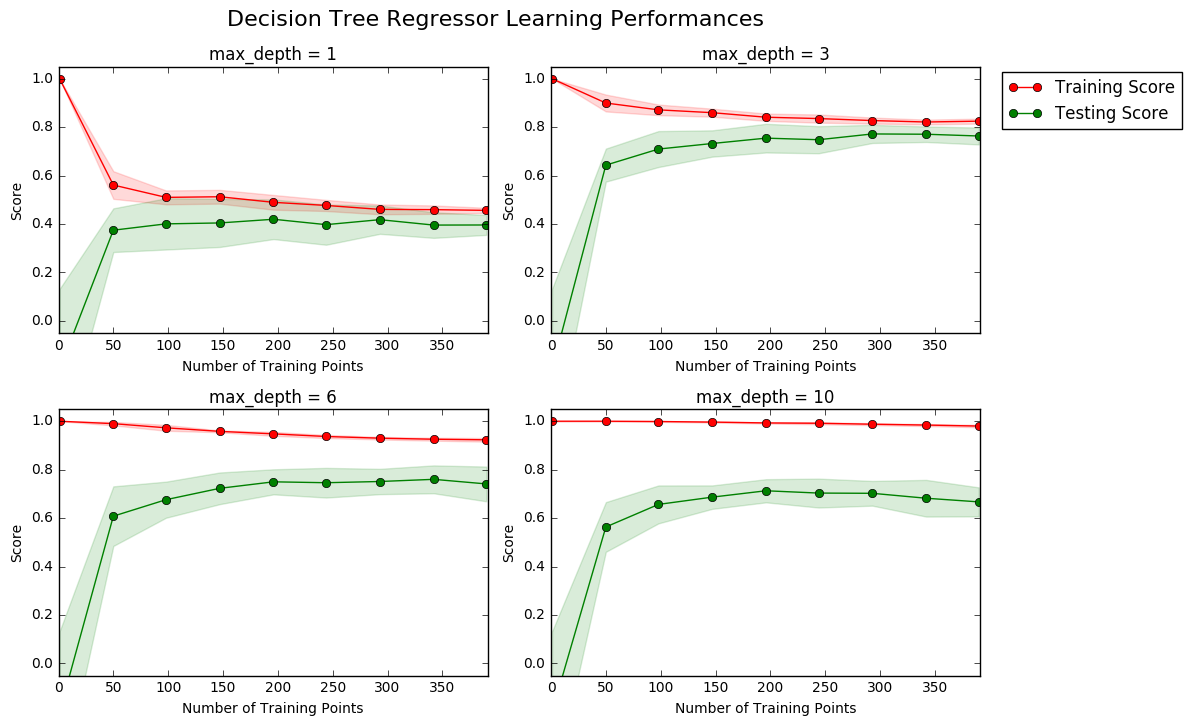

In [7]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **

The chosen graph for the learning Performance of a Decision Tree Regressor with **max_depth 3**, as Decision Tree with this parameter is most suitable for making the model robust.

- The score of the **training curve** decreases in the beginning but then remains constant with accuracy value of just above 0.8. There is a gradual decrease in small data sets, but starts to plateau after 250 data sets, remaining practically constant after 300 data sets. This indicates that increasing data sets beyond 300 will not improve the performance of the model. The model is training well up to the 300 sets, thus having more data sets would not benefit it. It is also now evident that a split of 80% from the entire data sets for training set has been a good decision.


- The **validation score** increases sharply to 0.6 at 50 data sets, and then there is a gradual increase till 300 data sets, and finally starts to plateau after. Thus it can be seen although when data sets are continuously added till 300 sets the model performs quite well, but as sets more than 300 are added, there is no change in the performance of the model. The model has the best score at around 300 data points. 


It can be concluded that Decision Tree Regressor with max_depth 3 is complex enough to predict data better than the rest of the other models exhibited in the graph above.

- Amongst the four learning curves, the graph with **max_depth 3** performs quite well because the training score is quite high, and the validation score is also high compared to the other curves. 
- Also, that both the training and testing curve start to converge from 200 data points with **very little gap** and remains almost parallel. The convergence of the curves with little gap at a high score suggests that the model will generalize to unseen data and so **perform the best**.

- The gap between them are higher in the learning curve with **max_depth = 6**, confirming that the value of 6 for max_depth would overfit the model, increasing significantly in **max_depth = 10** showing an **overfitted model**. 
- A significant low training and testing score in the curve with **max_depth = 1** suggests that the model **underfits**, and will not be able to predict expected outcomes.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

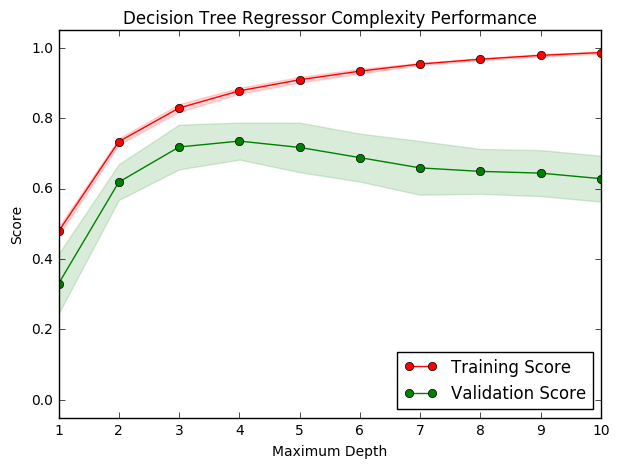

In [8]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **


In the above graph, we can see that the model with a **maximum depth of 1** has the training score of about 0.5 and the validation score of about 0.4. Both of which are very low advocating that the model may not be able to correctly predict on new unseen data, hence an **underfitting** model. This means that the model suffers from **high bias**. Such model will misrepresent data, resulting in a low accuracy. The same is can be analysed from the learning curve above.

While, the model trained with a **maximum depth of 10** has training score almost equal to 1 and validation score around 0.7, suggesting a lower validation score compared to training score. Such a model is highly sensitive to training set. The large gap between the scores and poor validation score suggest **overfitting**, and hence **high variance**. So, we can conclude that such a model will not be able to generalize on unseen data.

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **

A learning algorithm is robust when both the bias and variance of the model is as low as possible, also known as **bias-variance trade off**. Thus to choose the model that best generalizes to unseen data, we should check **two** criteria, 
- one is the value of **training and validation score** compared to other models 
- and second is the **gap** between the two scores.

From the complexity curves above we can derive that decision tree regressor with maximum depth of value 3 and 4 are performing better than the remaining, because firstly both the **training and validation score** are higher for the two models and secondly the **gap** between the two scores are less. However, it can be further noted that, 

- The gap between **training and validation score** in model with maximum depth 3 is less than that of 4
- The value of **training and validation score** is higher for model with maximum depth 4 compared to maximum depth of 3

In conclusion, based on the above graph it can be said that model with maximum depth 4 will best generalize to unseen data. This model has low bias, as the performance score is significantly higher for both **training and validation score** compared to all other models and has low variance as the gap between the scores are less compared to the other curves. However, we can see that model with maximum depth 3 has the smallest gap between **training and validation score** but based on the **bias-variance tradeoff**, the **best-guess optimal model** should be a model with **maximum depth 4**.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **

Machine Learning Algorithms behave differently by changing the hyper-parameters, thus allowing the algorithms to adapt to the specifics of the machine learning problem. There is thus a need to determine the combination of the parameters to best fit the problem in hand. This process is called **hyperparameter optimization** or **model selection**. 

**Grid Search** is a technique to tune parameters that will train and evaluate a machine learning algorithm for each manually specified combination of parameters. It exhaustively searches through a **grid of parameter values** to evaluate the performance of the model and the best combination is retained. 

A Grid Search uses a **score function** to evaluate the parameter setting. When evaluating the **optimal model** it is necessary that it is done on a data that was not seen during the **Grid search process**. Thus a split of the original data into two, training and testing is done in the beginning before assigning it to the grid search, ensuring that the model has not seen the test set and consequently this test set is entirely unseen. 

The training set is again split into separate sets, **training and validation**, using **cross-validation training technique**. The training proceeds on the new training set and then evaluation is done on the other validation set. The unused test set split in the beginning is then used later to evaluate the resulting model. The cross-validation such as **k-fold cross-validation** used most often, allows the grid search to be more robust and estimate a better optimal model.

----

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **

**Cross-validation training** is a technique for assessing the performance of a predictive model on an independent unseen data set with a goal to limit **overfitting**. The original data set is **split** into training set, on which the model is trained, and a test set, used to test the model, so that it generalizes to unseen data. A simple cross-validation technique has **one training set** and **one testing set**. Such a validation technique can have high variance, as the evaluation depends heavily on which data set end up in the training set and which end up in the test set. The evaluation may be significantly different depending on how the division is made. 

However, **k-fold cross-validation** is an improvement over the simple cross-validation technique. The original set is partitioned into **k equal size subsets**. One of the subset from the division is retained as the validation data for testing the model, and the rest k-1 subset are used as training set. The validation process is then repeated k times (the folds), with each of the k subsets used exactly once as the validation data, and k-1 times as training data. 

The k results from the folds can then be averaged to produce a single estimation. The **advantage** of this method is that it matters less how the division of the data is made. The **disadvantage** is that the algorithm has to run k times and hence takes k times computation to evaluate.

As, **grid search** requires that data be split into three sets; training, validation and testing sets, the first two split is used by it to derive an optimal model and the third set is then used to evaluate this optimal model to determine how well it generalizes on unseen data. This reduces the number of samples used for learning the model, and the results may be dependent on the division of the data. 

Here, K-fold cross validation technique allows to reuse of the validation set as training set, there by increasing the number of training data to train the model, as each k subsets are used k-1 times as training sets and 1 time as testing set. One of the subset from k subsets are used to compute the performance of the model, thus allowing the grid search to estimate an optimal model with a very low bias and low variance. 

Since grid search exhaustive searches through the parameters in the grid, **K-fold cross-validation** techniques thus allows different randomness of sets of data to train and test the model in each iteration, making the estimated model highly robust.

----

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [14]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': list(range(1,11))}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [15]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **

The maximum depth of an **Optimal model** is **4**. This result is same as my guess in **Question 6**. 

Based on **Bias-Variance Trade off**, I had selected model with maximum depth 4 as the best guess optimal model. The same has been arrived at through **Grid Search technique**. 

From this it is evident that for this model, the training and validation score of higher was chosen over the gap between them. While in case of model with maximum depth 3 had the lowest gap between the training and validation score, it had these scores lower than **the optimal model (maximum depth 4)** selected by **grid search**.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [17]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

print "\nMaximum Priced House"
print data[data.MEDV == maximum_price]
print "\nMinimum Priced House"
print data[data.MEDV == minimum_price]
print "\nHouse with Median Price"
print data[data.MEDV == median_price]

Predicted selling price for Client 1's home: $409,752.00
Predicted selling price for Client 2's home: $220,886.84
Predicted selling price for Client 3's home: $937,650.00

Maximum Priced House
        RM  LSTAT  PTRATIO       MEDV
253  8.398   5.91     13.0  1024800.0

Minimum Priced House
        RM  LSTAT  PTRATIO      MEDV
381  5.453  30.59     20.2  105000.0
388  5.683  22.98     20.2  105000.0

House with Median Price
        RM  LSTAT  PTRATIO      MEDV
69   5.885   8.79     18.9  438900.0
247  5.876   9.25     16.4  438900.0


**Answer: **

Based on the prediction provided by the optimal model the recommended sale prices for their  home are as follows:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
| **Predicted/Recommended Selling Price** | **`$`409,752.00** | **`$`220,886.84** | **`$`937,650.00** |

Statistics Calculated on the data:

**Minimum price**: `$`105,000.00<br>
**Maximum price**: `$`1,024,800.00<br>
**Mean price**: `$`454,342.94<br>
**Median price**: `$`438,900.00<br>
**Standard deviation of prices**: `$`165,171.13<br>

- The price of Client 1's home is almost equal to the median price of all the data used in model prediction. If we compare the features of the house with median price, we will see that it mostly matches the features as the house of Client 1.

**House with the Median Price**

| Row  | RM | LSTAT | PTRATIO | MEDV |
| :---: | :---: | :---: | :---: | | :---: |
| 69 | 5.885 | 8.79 | 18.9 | 438900.0 |
| 247 | 5.876 | 9.25 | 16.4 | 438900.0 |

- The price of Client 2's home is nearing the minimum price. Again here, if we examine the feature `'LSTAT'` and `'PTRATIO'` with the house with minimum price, we can see that both these values are as high as in the case of Client2, thus we can say that the price is most comparable.

**Minimum Priced House**

| Row  | RM | LSTAT | PTRATIO | MEDV |
| :---: | :---: | :---: | :---: | | :---: |
| 381 | 5.453 | 30.59 | 20.2 | 105000.0 |
| 388 | 5.683 | 22.98 | 20.2 | 105000.0 |

- While, the Client 3 can sell the home at a higher price amongst the three, which can be justified from the below table revealing that features of Client 3's home is similar to the house with maximum price. 

**Maximum Priced House**

| Row  | RM | LSTAT | PTRATIO | MEDV |
| :---: | :---: | :---: | :---: | | :---: |
| 253 | 8.398 | 5.91 | 13.0 | 1024800.0 |

Although, the optimal model is not a robust model, but based on the statistics we can assume the prices for the three to be around the observed value. 

A correct evaluation can only be done by testing it with more data and evaluating it with the statistics we have of the data in hand. The three test cases used to predict labels are lying close the statistics we evaluated for the data, but if we were to predict for features that are extrapolated then the model fails. 

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [18]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **

Although a constructed model is highly optimized, and also that the most suitable machine learning approaches have been used to derive at an optimal model, there are several shortcomings of the model and thus cannot be used in real-world setting.

**Sensitivity Test**
- It can be gathered from the **sensitivity test** performed above that the predicted labels vary based on the randomness of the training data. When the **random_state** is changed from 1 to 10, the prices of the homes predicted by the optimal model have the range in prices of **`$`73,000.00**, indicating that the model is highly sensitive to the division of the training data. The model is highly influenced by the initial split of training and testing sets.

**Inadequate Features**
- The price of a property is susceptible to **many more features** such as **area, amenities, garage space, furnished/unfurnished, views from the house, etc.** which have not been taken into account. There could also be things like how close the home is from shopping complex, multiplex, etc. One most important feature, the age of the house which could depreciate the price significantly hasnot been taken into considerations too. The current training data has taken only three features into account for predicting the price, thus is incapable of fitting well to the real world scenario.
- Since, more features are required, there is need for more training data too, which is quite less in the data used. 

**Data Quality**
- The data set used to train the model are quite old. From the time the data was collected to the present time, there could have been several changes in the physical aspect of the underlying dependent attributes that could affect the price of the house. Such as, changes in government regulations, increase in the population, infrastructure development in the neighbourhood, age of the house, etc. These changes cannot be accounted for by just scalling the price to meet market inflation. 
- The data has not been collected to incorporate the different types of regions, the collected data is from a developed city such as Boston, which most definitely cannot be used to predict areas that are on the countryside. 

**Unexpected output with extrapolation**
- The model is incapable of providing expected values to unknown situation by assuming that existing trends will continue. There is a limitation as it is only capable of predicting values within the values used in training. However, it is highly unlikely for any model to be capable of predicting to unknown situation, but for a real world setting we would need it to be robust enough not to break when extrapolation is done. The following output demonstrates extrapolation.

In [19]:
# Extrapolated client data to show minimum price
client_data = [[4, 32, 22], # Client 1 - to show minimum
               [2, 32, 52], # Client 2
               [1, 53, 32]]  # Client 3

print "Selling price at lowest with different features"
# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

    
# Extrapolated client data to show maximum price
client_data = [[9, 7, 17], # Client 1 - to show maximum
               [11, 5, 15], # Client 2
               [8, 3, 12]]  # Client 3
print ""
print "Selling price at highest with different features"
# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)


Selling price at lowest with different features
Predicted selling price for Client 1's home: $220,886.84
Predicted selling price for Client 2's home: $220,886.84
Predicted selling price for Client 3's home: $220,886.84

Selling price at highest with different features
Predicted selling price for Client 1's home: $937,650.00
Predicted selling price for Client 2's home: $937,650.00
Predicted selling price for Client 3's home: $937,650.00


**Continuation**

Even if the features of the client are different the values remain the same for minimum and maximum. This indicates that the price does not fall below **`$`220,886.84** and increase above **`$`937,650.00**, even if the features are changed.

**Conclusion**

The optimal model is not suitable for the real world scenario, but for it to be usable, the model should be trained into data sets considering for all the shortcomings listed above.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.